1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import linalg as la

In [7]:
n = 1000

x1 = np.random.normal(0, 1, n)
x2 = (np.random.normal(0, 3, n) +x1)
x3 = (2*x1+x2)
X = np.array([x1, x2, x3])
X

array([[ 0.33773491, -0.86503482,  0.83419823, ..., -0.29521296,
        -0.4404325 , -0.99524776],
       [-2.57739408, -0.54958767,  4.45385499, ..., -1.00606571,
         2.05663214, -5.5374714 ],
       [-1.90192427, -2.2796573 ,  6.12225145, ..., -1.59649162,
         1.17576713, -7.52796692]])

In [8]:
#eigenvectors and eigenvalues 
covariance = np.cov(X)
l, V = la.eig(covariance)
l = np.real_if_close(l)

print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')

Eigenvalues:
 [ 2.55898633e+01 -5.65431652e-16  2.00804781e+00] 

Eigenvectors:
 [[-0.11944009 -0.81649658  0.56486051]
 [-0.57236993 -0.40824829 -0.71114415]
 [-0.8112501   0.40824829  0.41857688]] 



In [9]:
#eigenvectors and eigenvalues using the SVD.
U, S, VT = np.linalg.svd(X)
l_svd = S**2/(n-1)
V_svd = U

print("Eigenvalues using the SVD:\n", l_svd, '\n')
print("Eigenvectors using the SVD:\n", V_svd, '\n')

Trans_U = U.T
X_new = np.dot(Trans_U, X)
print("Is orthogonal:",'\n', Trans_U, '\n')
print(U, '\n')

Eigenvalues using the SVD:
 [2.55900745e+01 2.00839030e+00 5.64106056e-31] 

Eigenvectors using the SVD:
 [[-0.11943365  0.56486187 -0.81649658]
 [-0.57237804 -0.71113762 -0.40824829]
 [-0.81124533  0.41858613  0.40824829]] 

Is orthogonal: 
 [[-0.11943365 -0.57237804 -0.81124533]
 [ 0.56486187 -0.71113762  0.41858613]
 [-0.81649658 -0.40824829  0.40824829]] 

[[-0.11943365  0.56486187 -0.81649658]
 [-0.57237804 -0.71113762 -0.40824829]
 [-0.81124533  0.41858613  0.40824829]] 



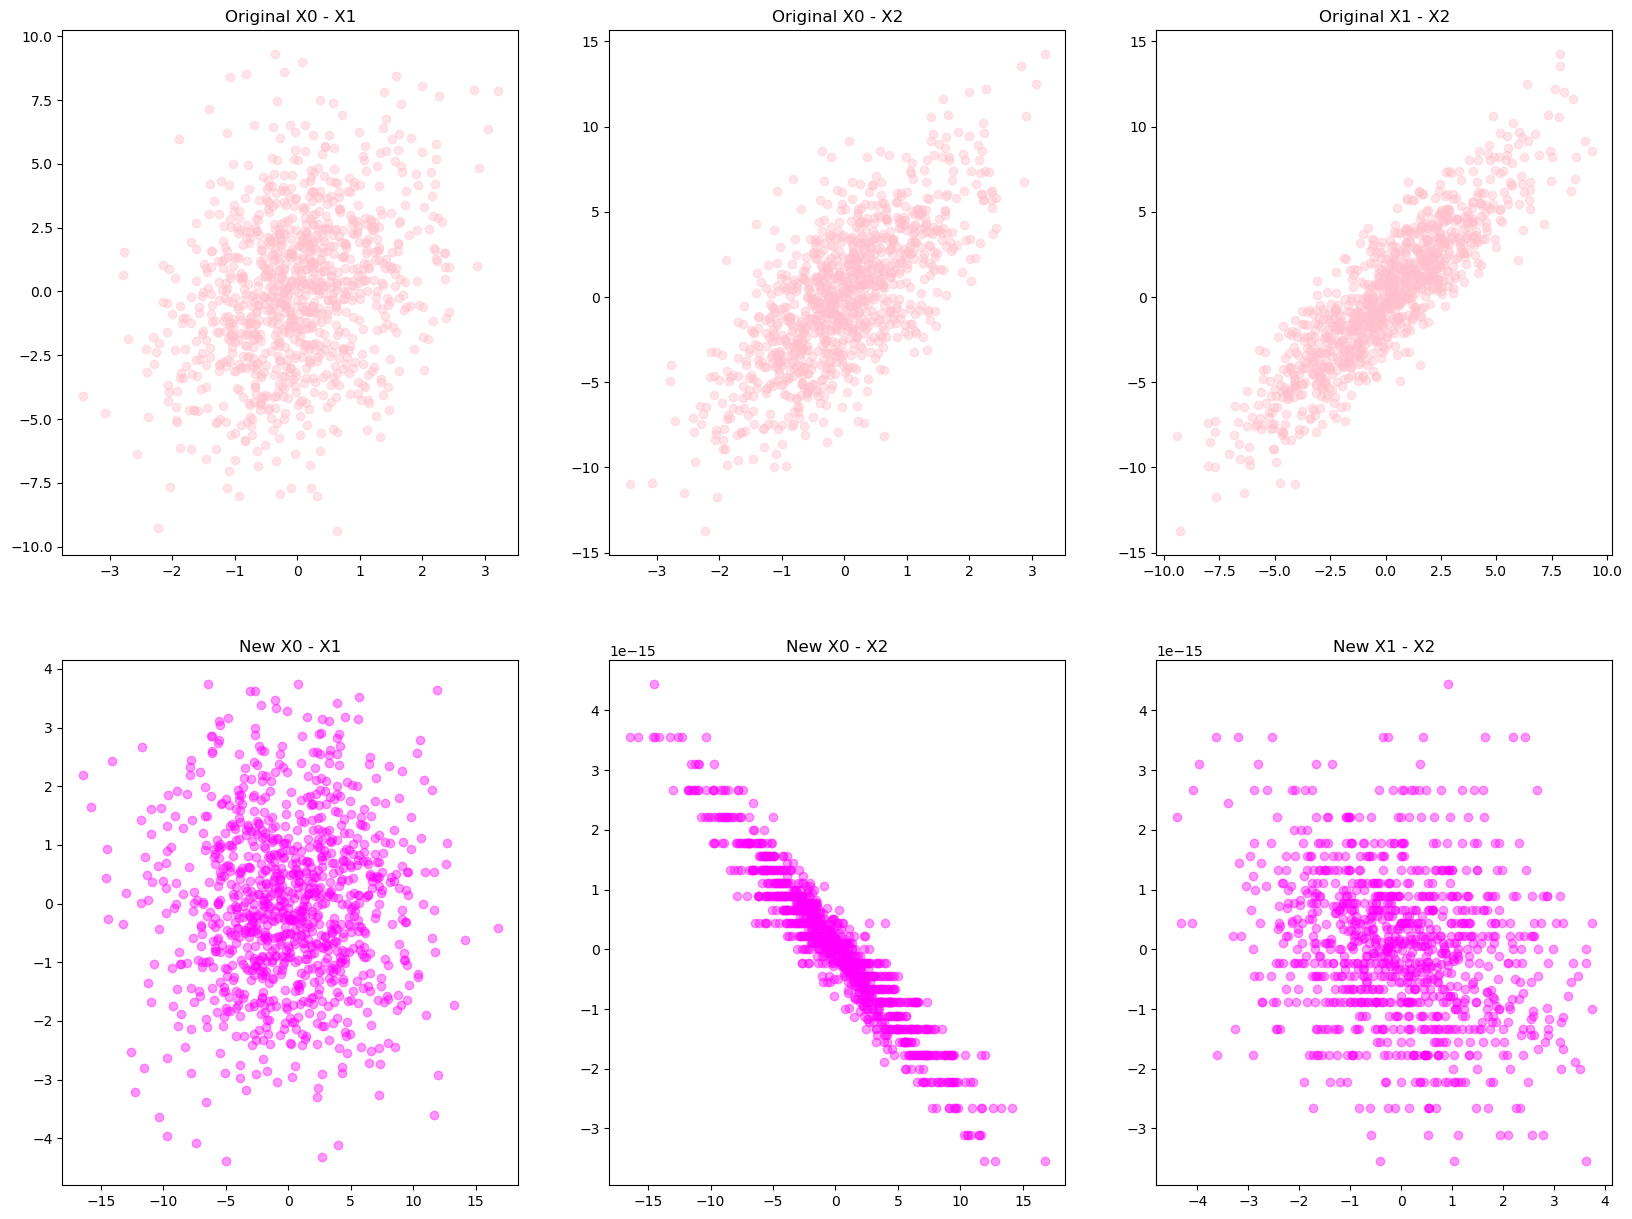

In [10]:
#Plotting the datasets
fig, axes = plt.subplots(2, 3, figsize=(20,15))

axes[0,0].scatter(X[0],X[1] ,alpha=0.4, marker='o',c='pink')
axes[0,0].title.set_text("Original X0 - X1")
axes[0,1].scatter(X[0],X[2] ,alpha=0.4,marker='o',c='pink')
axes[0,1].title.set_text("Original X0 - X2")
axes[0,2].scatter(X[1],X[2] ,alpha=0.4,marker='o',c='pink')
axes[0,2].title.set_text("Original X1 - X2")
axes[1,0].scatter(X_new[0],X_new[1] ,alpha= 0.4,marker='o',c='magenta')
axes[1,0].title.set_text("New X0 - X1")
axes[1,1].scatter(X_new[0],X_new[2] ,alpha= 0.4,marker='o',c='magenta')
axes[1,1].title.set_text("New X0 - X2")
axes[1,2].scatter(X_new[1],X_new[2] ,alpha= 0.4,marker='o',c='magenta')
axes[1,2].title.set_text("New X1 - X2")

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [11]:
#noise creation
noise = np.random.normal(loc=0, scale=20, size=1000)
noise_df=pd.DataFrame(noise)
df=pd.DataFrame(X)
noise_df= df.replace(noise)
print(" noise added dataset is:\n", noise_df, '\n')


 noise added dataset is:
         0         1         2         3         4         5         6    \
0  0.337735 -0.865035  0.834198 -1.824469  0.579623  1.075941  0.379902   
1 -2.577394 -0.549588  4.453855 -1.039681  2.391583  5.715526  0.376840   
2 -1.901924 -2.279657  6.122251 -4.688619  3.550829  7.867409  1.136643   

        7         8         9    ...       990       991      992       993  \
0 -1.315400 -0.277807 -0.325622  ...  0.629824 -0.437537 -1.17718  0.492516   
1 -1.153284 -1.988899 -0.980567  ... -3.179588 -0.723918  1.25337  2.496594   
2 -3.784085 -2.544512 -1.631811  ... -1.919940 -1.598992 -1.10099  3.481625   

        994       995       996       997       998       999  
0  0.444788 -1.788430  1.455764 -0.295213 -0.440433 -0.995248  
1  1.046167 -2.268737 -3.757260 -1.006066  2.056632 -5.537471  
2  1.935743 -5.845597 -0.845732 -1.596492  1.175767 -7.527967  

[3 rows x 1000 columns] 



In [12]:
#eigenvectors and eigenvalues 
cov = np.dot(noise_df, noise_df.T)/(1000-1)
print("Covariance matrix:\n", cov,'\n')

n =1000
covariance = np.cov(X)
l, V = la.eig(covariance)
l = np.real_if_close(l)
print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')

#eigenvectors and eigenvalues using the SVD.
U, S, VT = np.linalg.svd(noise_df)
l_svd = S**2/(n-1)
V_svd = U
print("Eigenvalues using the SVD:\n", l_svd, '\n')
print("Eigenvectors using the SVD:\n", V_svd, '\n')

# Checking the results
print("Eigen decomposition eigenvalues:\n", l)
print("SVD of eigenvalues:\n", l_svd, '\n')
print("Eigen decomposition eigenvectors:\n", V)
print("SVD of eigenvectors:\n", V_svd, '\n')

new_df = np.dot(V_svd.T, noise_df)
print("new dataset:\n", new_df, '\n')
print("old dataset:\n", noise_df, '\n')

Covariance matrix:
 [[ 1.00584191  0.9426087   2.95429252]
 [ 0.9426087   9.39941024 11.28462764]
 [ 2.95429252 11.28462764 17.19321269]] 

Eigenvalues:
 [ 2.55898633e+01 -5.65431652e-16  2.00804781e+00] 

Eigenvectors:
 [[-0.11944009 -0.81649658  0.56486051]
 [-0.57236993 -0.40824829 -0.71114415]
 [-0.8112501   0.40824829  0.41857688]] 

Eigenvalues using the SVD:
 [2.55900745e+01 2.00839030e+00 5.64106056e-31] 

Eigenvectors using the SVD:
 [[-0.11943365  0.56486187 -0.81649658]
 [-0.57237804 -0.71113762 -0.40824829]
 [-0.81124533  0.41858613  0.40824829]] 

Eigen decomposition eigenvalues:
 [ 2.55898633e+01 -5.65431652e-16  2.00804781e+00]
SVD of eigenvalues:
 [2.55900745e+01 2.00839030e+00 5.64106056e-31] 

Eigen decomposition eigenvectors:
 [[-0.11944009 -0.81649658  0.56486051]
 [-0.57236993 -0.40824829 -0.71114415]
 [-0.8112501   0.40824829  0.41857688]]
SVD of eigenvectors:
 [[-0.11943365  0.56486187 -0.81649658]
 [-0.57237804 -0.71113762 -0.40824829]
 [-0.81124533  0.41858613 

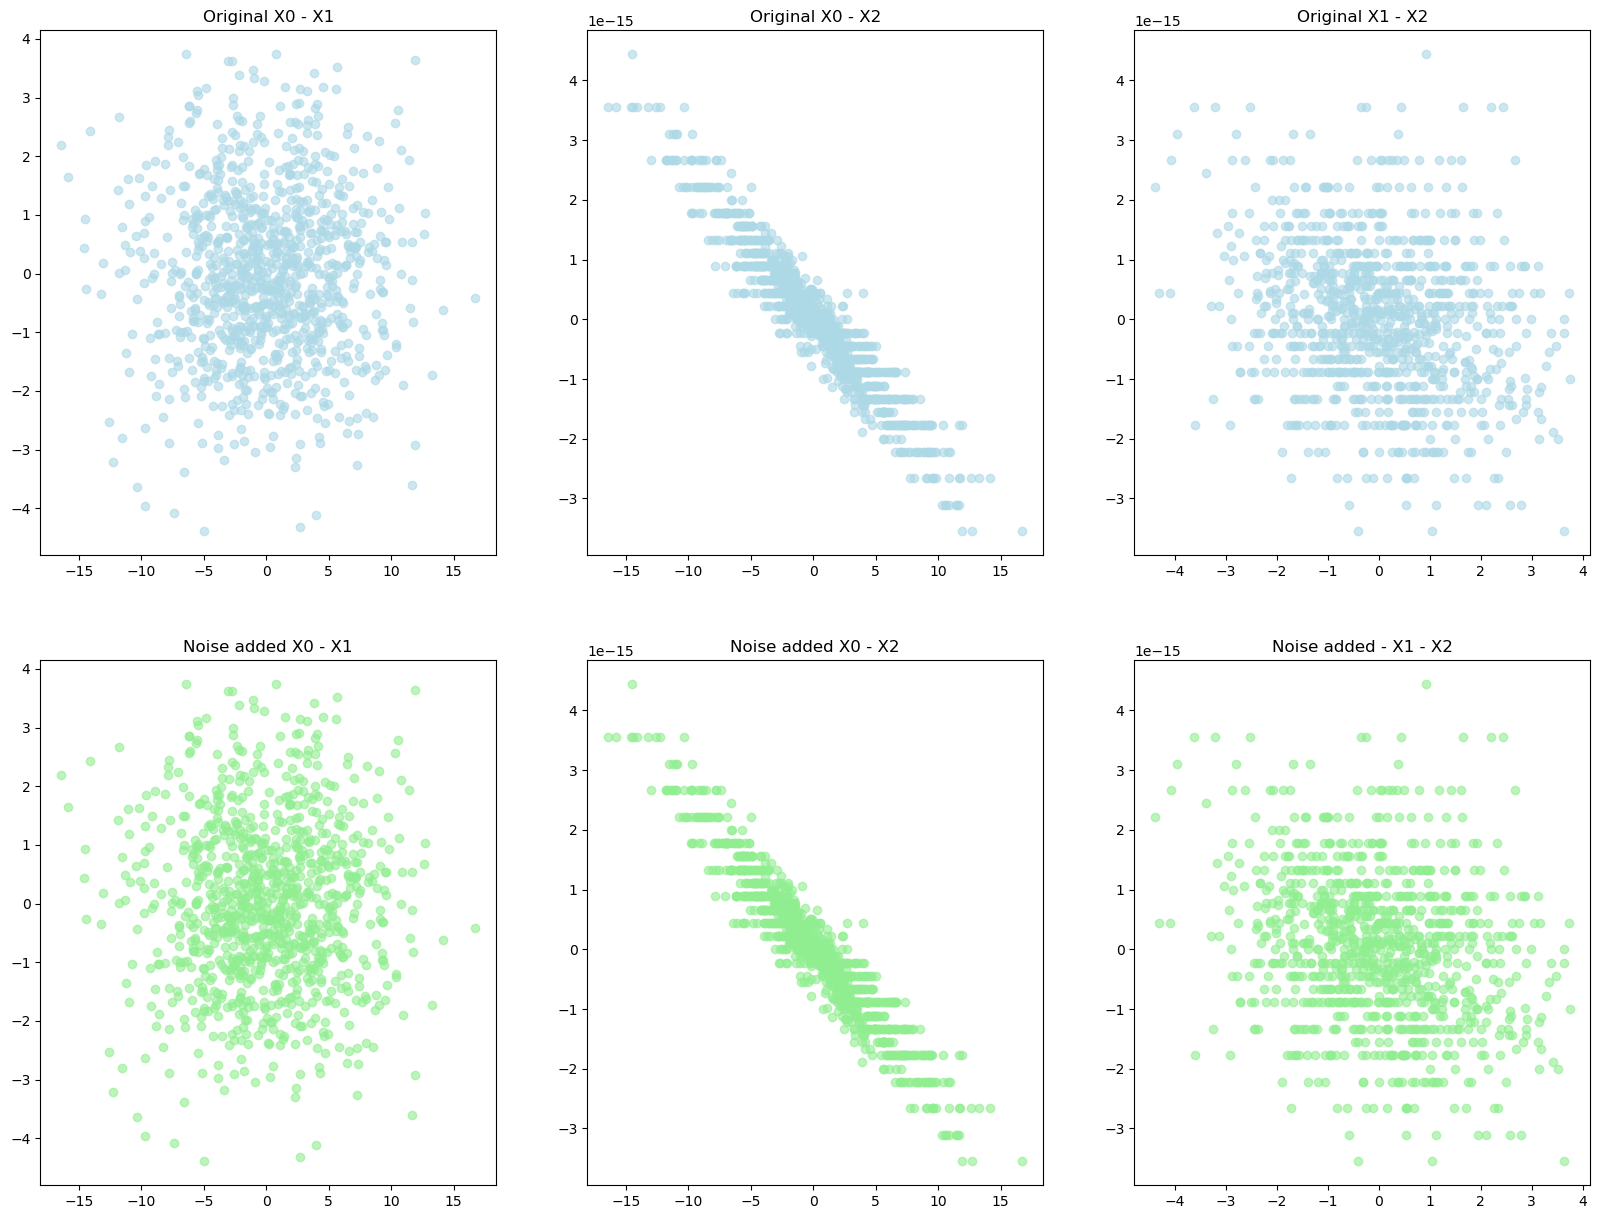

In [13]:
#comparing the results 
fig, axes = plt.subplots(2, 3, figsize=(20,15))
axes[0,0].scatter(X_new[0],X_new[1] ,color="lightblue",alpha=0.6)
axes[0,0].title.set_text("Original X0 - X1")
axes[0,1].scatter(X_new[0],X_new[2] ,color="lightblue",alpha=0.6)
axes[0,1].title.set_text("Original X0 - X2")
axes[0,2].scatter(X_new[1],X_new[2] ,color="lightblue",alpha=0.6)
axes[0,2].title.set_text("Original X1 - X2")
axes[1,0].scatter(new_df[0],new_df[1] ,color="lightgreen",alpha=0.6)
axes[1,0].title.set_text("Noise added X0 - X1")
axes[1,1].scatter(new_df[0],new_df[2] ,color="lightgreen",alpha=0.6)
axes[1,1].title.set_text("Noise added X0 - X2")
axes[1,2].scatter(new_df[1],new_df[2] ,color="lightgreen",alpha=0.6)
axes[1,2].title.set_text("Noise added - X1 - X2")

In [14]:
print("The percentual of dataset variability :"+ str(np.real(np.sum(l[:12])/np.sum(l))*100))

The percentual of dataset variability :100.0


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [15]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

--2023-01-20 15:07:49--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1,4M) [application/x-httpd-php]
Saving to: ‘data/magic04.data.1’

magic04.data.1      100%[===================>]   1,41M   640KB/s    in 2,3s    

2023-01-20 15:07:52 (640 KB/s) - ‘data/magic04.data.1’ saved [1477391/1477391]

--2023-01-20 15:07:52--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5400 (5,3K) [application/x-httpd-php]
Saving to: ‘data/magic04.names.1’

magic04.names.1     100%[===================>]   5,27K  

In [25]:
import pandas as pd

dataset1 = pd.read_csv("data/magic04.data")
dataset1 = dataset1.drop(['g'], axis=1)
dataset1 = dataset1.T
dataset1

,0,1,2,3,4,5,6,7,8,9,...,19009,19010,19011,19012,19013,19014,19015,19016,19017,19018
28.7967,31.6036,162.0520,23.8172,75.1362,51.6240,48.2468,26.7897,96.2327,46.7619,62.7766,...,32.4902,79.5528,31.8373,182.5003,43.2980,21.3846,28.9452,75.4455,120.5135,187.1814
16.0021,11.7235,136.0310,9.5728,30.9205,21.1502,17.3565,13.7595,46.5165,15.1993,29.9104,...,10.6723,44.9929,13.8734,76.5568,17.3545,10.9170,6.7020,47.5305,76.9018,53.0014
2.6449,2.5185,4.0612,2.3385,3.1611,2.9085,3.0332,2.5521,4.1540,2.5786,3.3331,...,2.4742,3.5488,2.8251,3.6872,2.8307,2.6161,2.2672,3.4483,3.9939,3.2093
0.3918,0.5303,0.0374,0.6147,0.3168,0.2420,0.2529,0.4236,0.0779,0.3377,0.2475,...,0.4664,0.1656,0.4169,0.1123,0.2877,0.5857,0.5351,0.1417,0.0944,0.2876
0.1982,0.3773,0.0187,0.3922,0.1832,0.1340,0.1515,0.2174,0.0390,0.1913,0.1261,...,0.2735,0.0900,0.1988,0.0666,0.1646,0.3934,0.2784,0.0549,0.0683,0.1539
27.7004,26.2722,116.7410,27.2107,-5.5277,50.8761,8.5730,29.6339,110.3550,24.7548,-33.9065,...,-27.0097,-39.6213,-16.4919,192.2675,-60.1842,15.2618,37.0816,-9.3561,5.8043,-167.3125
22.011,23.8238,-64.8580,-6.4633,28.5525,43.1887,38.0957,20.4560,85.0486,43.8771,57.5848,...,-21.1687,53.7866,-27.1448,93.0302,-33.8513,11.5245,13.1853,41.0562,-93.5224,-168.4558
-8.2027,-9.9574,-45.2160,-7.1513,21.8393,9.8145,10.5868,-2.9292,43.1844,-6.6812,23.7710,...,8.4813,-30.0054,11.1098,-62.6192,-3.6545,2.8766,-2.9632,-9.4662,-63.8389,31.4755
40.092,6.3609,76.9600,10.4490,4.6480,3.6130,4.7920,0.8120,4.8540,7.8750,9.9144,...,69.1730,15.8075,11.3663,82.1691,78.4099,2.4229,86.7975,30.2987,84.6874,52.7310
81.8828,205.2610,256.7880,116.7370,356.4620,238.0980,219.0870,237.1340,248.2260,102.2510,323.0940,...,120.6680,311.5680,100.0566,283.4731,224.8299,106.8258,247.4560,256.5166,408.3166,272.3174


In [44]:

covariance = np.cov(dataset1)
print("Covariance matrix:\n", covariance,'\n')
l, V = la.eig(covariance)
l = np.real_if_close(l)
print("Eigen values:\n", l, '\n')
print("Eigen vectors:\n", V, '\n')



#SVD
U, S, VT = np.linalg.svd(X)
l_svd = S**2/(n-1)
V_svd = U

for i in range(len(dataset1)):
    print("The percentual of dataset variability using "+str(i)+" components: "+ str(np.real(np.sum(l[:i])/np.sum(l))*100))

    

Covariance matrix:
 [[ 1.79484386e+03  5.98887086e+02  1.40647372e+01 -4.88723699e+00
  -2.80054871e+00 -9.24441522e+02 -2.58726016e+02  1.18037602e+01
  -9.69132366e+00  1.32478986e+03]
 [ 5.98887086e+02  3.36593472e+02  6.22137035e+00 -2.04524066e+00
  -1.17829371e+00 -2.89977185e+02 -1.64898679e+02  1.51841391e+01
   3.16424013e+01  4.61774113e+02]
 [ 1.40647372e+01  6.22137035e+00  2.23359521e-01 -7.35148362e-02
  -4.22456089e-02 -4.47300996e+00  2.29376373e+00  1.52049280e-01
  -2.30292805e+00  1.54352188e+01]
 [-4.88723699e+00 -2.04524066e+00 -7.35148362e-02  3.34223972e-02
   1.97273268e-02  1.21523946e+00 -1.13659419e+00 -4.29996627e-02
   1.12278904e+00 -4.48582887e+00]
 [-2.80054871e+00 -1.17829371e+00 -4.22456089e-02  1.97273268e-02
   1.22132646e-02  6.55394863e-01 -6.69414421e-01 -2.52476965e-02
   6.62952807e-01 -2.51602369e+00]
 [-9.24441522e+02 -2.89977185e+02 -4.47300996e+00  1.21523946e+00
   6.55394863e-01  3.50548814e+03  8.27506945e+02  3.16233361e+00
  -8.60918398